### Training the Value Function (similar to Q - Learning)



In [1]:
# the required imports
import numpy as np
import pandas as pd
# from linear_aproximation import Model
# from environment import network
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# additional import for the Neural Network
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras import optimizers
import tensorflow as tf


Using TensorFlow backend.


In [2]:
# path = '/Users/mawongh/OneDrive/REFERENCE FILE/D/Disertation/brainstorming/'
path = '/home/mawongh/ws/datasets/'
dataset = pd.read_pickle(path + 'full_dataset.pickle')
dataset.tail(3)

,action,reward,s_next,state
299475,121.0,-2.915486,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
299476,121.0,-3.054551,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
299477,121.0,-2.653020,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."


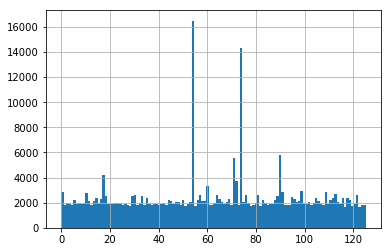

In [4]:
dataset.action.hist(bins=126)
plt.show()

In [5]:
# decorrelating samples
N = len(dataset)
sample_indexes = np.random.choice(np.arange(N), size = N, replace=False)
dataset_decorr = dataset.iloc[sample_indexes]

S_woScale = dataset_decorr.state.tolist()
S_next_woScale = dataset_decorr.s_next.tolist()
a = dataset_decorr['action'].values
r = dataset_decorr['reward'].values

scaler = StandardScaler()
S = scaler.fit_transform(S_woScale)
S_next = scaler.transform(S_next_woScale)


In [10]:
# The model
Q = Sequential()
n_cols = 105

Q.add(Dense(400, activation = 'relu', input_shape=(n_cols,)))
Q.add(Dense(400, activation = 'relu'))
Q.add(Dense(400, activation = 'relu'))
Q.add(Dense(126, activation = 'linear'))
Q.compile(optimizer=optimizers.Adam(), loss='mean_squared_error')

# the initial version of Qhat will be the original trained model
modelfilename = 'MDP_model6.h5'
Qhat = load_model(path + modelfilename)

In [16]:

def train_model(num_epochs, targetmodel, gamma):
    for epoch in np.arange(num_epochs):
        print('model training, epoch: {}'.format(epoch))
        for step in np.arange(len(S)):
            s = S[step].reshape(1,-1)
            s_next = S_next[step].reshape(1,-1)
            target = Q.predict_on_batch(s)
            target[0,int(a[step])] = r[step] + gamma * np.max(targetmodel.predict(s_next))
            Q.train_on_batch(s,target)

In [ ]:
# train the model for 5 epochs using the MDP as a target
train_model(num_epochs = 5, targetmodel = Qhat, gamma = 0.9)
print('trained!')


model training, epoch: 0
model training, epoch: 1


In [ ]:
# train the model for 15 epochs using the same network as a target
for i in np.arange(3):
    print('iteraction: {}'.format(i))
    Qhat.set_weights(Q.get_weights())
    train_model(num_epochs = 5, targetmodel = Qhat, gamma = 0.9)
print('trained!')



iteraction: 0
model training, epoch: 0
model training, epoch: 1
model training, epoch: 2
model training, epoch: 3


In [21]:
#save the model
Q.save(path + '300K_Q_network_final_v2.h5')
Q.save_weights(path + '300K_Q_network_final_weights_v2.h5')

In [23]:
# save the scaling parameters
np.savetxt(path + '170908_DQN_300K_scaler-mean_.csv', scaler.mean_, delimiter=',')
np.savetxt(path + '170908_DQN_300K_scaler-scale_.csv', scaler.scale_, delimiter=',')


## Playground

In [ ]:
np.array([[1,2], [1], [2,3]])

In [ ]:
np.random.choice(20, 30, replace=False)

In [ ]:
np.min([20, 30])

In [ ]:
100 % 100

In [ ]:
model.get_weights()

In [ ]:
s = np.array([10, 20, 40, 50])
s.reshape(1,-1)[0]

In [ ]:
model.get_weights()s.reshape(-1,1)

In [ ]:
model.save('test.h5')




In [ ]:
print("%03d" % (100,))